In [1]:
import os
import sys
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import glob
import csv
import pandas as pd
%matplotlib inline

import seaborn as sns
sns.set_style("whitegrid")

In [2]:
df_all = pd.read_csv('./data/different_slate_size.csv')

df_all['Precision (%)'] = df_all['Precision (%)'] * 100
df_all['Recall (%)'] = df_all['Recall (%)'] * 100

df_all

,Slate Size,Algorithm,Seed,Precision (%),Recall (%),Diversity,CC
0,3,Random,0,0.745374,0.031163,0.858850,0.278836
1,4,Random,0,0.750586,0.038244,0.926413,0.338258
2,5,Random,0,0.725567,0.045497,0.959944,0.387416
3,6,Random,0,0.761011,0.055800,0.978516,0.430196
4,7,Random,0,0.755054,0.065055,0.989660,0.468507
...,...,...,...,...,...,...,...
115,6,List-CVAE,954358,26.392580,4.569956,0.076900,0.456670
116,7,List-CVAE,954358,25.259608,4.917397,0.124285,0.478357
117,8,List-CVAE,954358,25.377130,5.676790,0.129104,0.503756
118,9,List-CVAE,954358,24.556650,5.918217,0.113844,0.539891


<ipython-input-15-b21aece081eb>:9: MatplotlibDeprecationWarning: 
The inverse_transformed function was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use transformed(transform.inverted()) instead.
  bb = lgd.get_bbox_to_anchor().inverse_transformed(ax.transAxes)


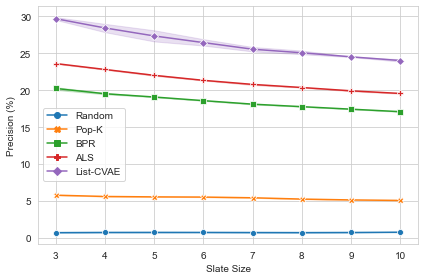

In [15]:
ax = sns.lineplot(x="Slate Size", y="Precision (%)", hue="Algorithm",
                  style="Algorithm", markers=True, dashes=False,
                  data=df_all)

handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles=handles[1:], labels=labels[1:], loc='center left')

# Get the bounding box of the original legend
bb = lgd.get_bbox_to_anchor().inverse_transformed(ax.transAxes)

# Change to location of the legend. 
xOffset = 0.08
bb.y0 -= xOffset
bb.y1 -= xOffset
lgd.set_bbox_to_anchor(bb, transform = ax.transAxes)


fig = ax.get_figure()
fig.tight_layout()
fig.savefig("precision.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')

# Put the legend out of the figure
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

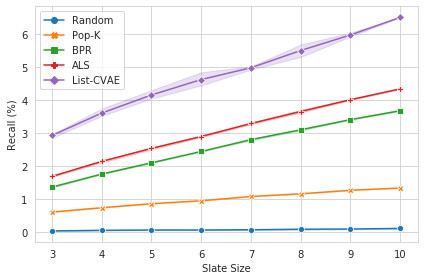

In [6]:
ax = sns.lineplot(x="Slate Size", y="Recall (%)", hue="Algorithm",
                  style="Algorithm", markers=True, dashes=False,
                  data=df_all)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:])


fig = ax.get_figure()
fig.tight_layout()
fig.savefig("recall.pdf")

In [40]:
df_large_slate = pd.read_csv('./data/large_slate_size.csv')

for name, group in df_large_slate.groupby(['Slate Size', 'Algorithm']):
    print(name)
    print(f"precision, mean: {group['Precision (%)'].mean()}, error: {group['Precision (%)'].std() / np.sqrt(len(group))}")
    print(f"recall, mean: {group['Recall (%)'].mean()}, error: {group['Recall (%)'].std() / np.sqrt(len(group))}")

(25, 'ALS')
precision, mean: 0.16443124381220356, error: 7.928602616484209e-05
recall, mean: 0.08498943738083638, error: 7.358754245334494e-05
(25, 'BPR')
precision, mean: 0.14196863112917568, error: 0.0001910415698693248
recall, mean: 0.07183727329301841, error: 0.00017074837451842764
(25, 'List-CVAE')
precision, mean: 0.18930957219529868, error: 0.0010238038256166983
recall, mean: 0.11283658302596968, error: 0.0004715831385098995
(25, 'Pop-K')
precision, mean: 0.0500891321344806, error: nan
recall, mean: 0.029538280320033243, error: nan
(25, 'Random')
precision, mean: 0.007499609069585511, error: 0.00013449218387590002
recall, mean: 0.002382642255415491, error: 8.521663289101124e-05
(50, 'ALS')
precision, mean: 0.140089625345211, error: 4.6032125111493914e-05
recall, mean: 0.13773555677707836, error: 0.00010873433052465392
(50, 'BPR')
precision, mean: 0.1196623417226802, error: 0.00011317344590739115
recall, mean: 0.11631622988793455, error: 0.00011679809317640819
(50, 'List-CVAE')
p

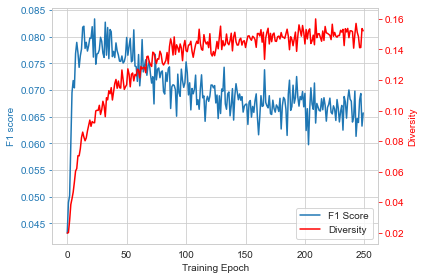

In [48]:
df_large_summary = pd.read_csv('../listcvae-250_epochs/result_outputs/summary.csv')

df_large_summary.columns = ['loss', 'precision', 'hr', 'F1 Score', 'Diversity', 'Training Epoch']

ax = df_large_summary.plot(x="Training Epoch", y="F1 Score", legend=False)
ax2 = ax.twinx()
df_large_summary.plot(x="Training Epoch", y="Diversity", ax=ax2, legend=False, color="r")
ax2.grid(None)

ax.set_ylabel("F1 score", color=ax.get_lines()[-1].get_color())
ax2.set_ylabel("Diversity", color=ax2.get_lines()[-1].get_color())

ax.tick_params(axis='y', colors=ax.get_lines()[-1].get_color())
ax2.tick_params(axis='y', colors=ax2.get_lines()[-1].get_color())

# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='lower right')

fig = ax.get_figure()
fig.tight_layout()
fig.savefig("training_large_epoch.pdf")

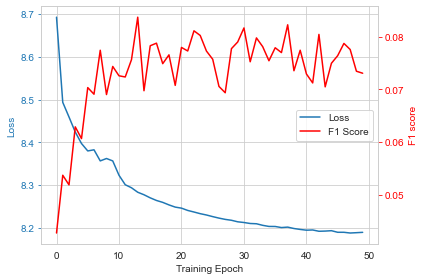

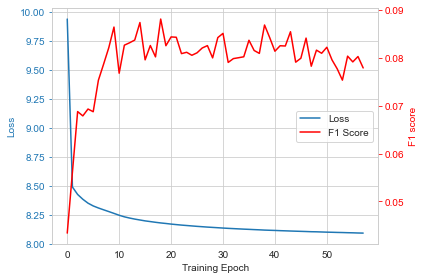

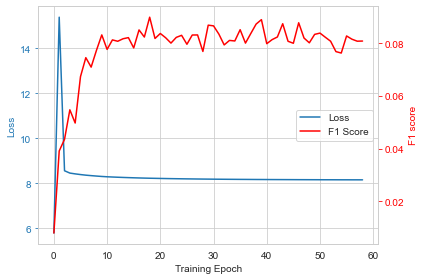

In [59]:
df_no_bn = pd.read_csv('../runs/listcvae_no_bn/tra_64_emb_32_lat_16_lr_0.001_enc_[256,256]_dec_[256,256]_pri_[32,32]_/result_outputs/summary.csv')
df_bn = pd.read_csv('../runs/listcvae_dropout_annealing/tra_64_emb_32_lat_16_lr_0.001_enc_[1024,1024]_dec_[1024,1024]_pri_[32,32]_enc_leaky_dec_leaky_pri_leaky_enc_0.1_dec_0.1_pri_0_typ_constant_max_1.5_cyc_1_/result_outputs/summary.csv')
df_annealing = pd.read_csv('../runs/listcvae_dropout_annealing/tra_64_emb_32_lat_16_lr_0.001_enc_[1024,1024]_dec_[1024,1024]_pri_[32,32]_enc_default_dec_default_pri_default_enc_0.1_dec_0.1_pri_0_typ_linear_max_2.0_cyc_1_/result_outputs/summary.csv')

for idx, df in enumerate([df_no_bn, df_bn, df_annealing]):
    df.columns = ['Loss', 'precision', 'hr', 'F1 Score', 'Diversity', 'Training Epoch']
    
    ax = df.plot(x="Training Epoch", y="Loss", legend=False)
    ax2 = ax.twinx()
    df.plot(x="Training Epoch", y="F1 Score", ax=ax2, legend=False, color="r")
    ax2.grid(None)
    
    ax.set_ylabel("Loss", color=ax.get_lines()[-1].get_color())
    ax2.set_ylabel("F1 score", color=ax2.get_lines()[-1].get_color())
    
    ax.tick_params(axis='y', colors=ax.get_lines()[-1].get_color())
    ax2.tick_params(axis='y', colors=ax2.get_lines()[-1].get_color())
    
    # ask matplotlib for the plotted objects and their labels
    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='center right')
    
    fig = ax.get_figure()
    fig.tight_layout()
    fig.savefig(f"training_plots_{idx}.pdf")



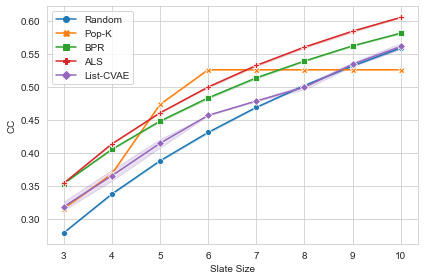

In [17]:
df_all = pd.read_csv('./data/different_slate_size.csv')

df_all['Precision (%)'] = df_all['Precision (%)'] * 100
df_all['Recall (%)'] = df_all['Recall (%)'] * 100

ax = sns.lineplot(x="Slate Size", y="CC", hue="Algorithm",
                  style="Algorithm", markers=True, dashes=False,
                  data=df_all)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:])


fig = ax.get_figure()
fig.tight_layout()
fig.savefig("cc.pdf")

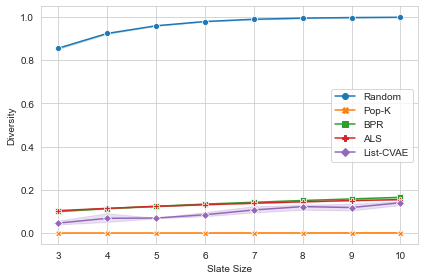

In [18]:
df_all = pd.read_csv('./data/different_slate_size.csv')

df_all['Precision (%)'] = df_all['Precision (%)'] * 100
df_all['Recall (%)'] = df_all['Recall (%)'] * 100

ax = sns.lineplot(x="Slate Size", y="Diversity", hue="Algorithm",
                  style="Algorithm", markers=True, dashes=False,
                  data=df_all)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:])


fig = ax.get_figure()
fig.tight_layout()
fig.savefig("cc.pdf")
